# Maximum Likelihood Estimation Lab

## Problem Description

In this lab, we'll explore _Maximum Likelihood Estimation_ and strategies for implementing it in python while making use of industry-standard tools such as the `scipy` library!

## Objectives

In this lab, we will:

* Demonstrate a conceptual understanding of Maximum Likelihood Estimation, and what it is used for
* Demonstrate understanding as to why we use Negative Log Likelihood instead of Likelihood for MLE in python
* Write a general-purpose function for Maximum Likelihood Estimation by using industry-standard packages such as `scipy`


Run the cell below to import everything we'll need for this lab. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

### Probability vs. Likelihood

Explain the difference between **_Probability_** and **_Likelihood_** below the line.  Use the two graphs below as aids for your explanation..    

<center><h3>Probability</h3></center>
<img src='probability.jpg' height=50% width=50%>
<br>
<br>
<center><h3>Likelihood</h3></center>
<img src='likelihood.jpg' height=50% width=50%>

________________________________________________________________________________________________________________________________

**_Probability_** is the amount of a distribution that falls between two different values in a distribution. When visualized, this amounts to the area under the curve between the two values of interest.  

**_Likelihood_** is the value for a fixed data point given a distribution (note that the distribution can change).  When visualized, this amounts to the y-axis value for the data point given the distribution it is visualized against. 



### Generating Datasets From Different Distributions

We're going to generate two different datasets to test our MLE function.  In the cell below:

* Create a sample Gaussian Distribution using numpy with 10,000 values in it. 
* Use a distplot from seaborn to visualize the distribution of each. 

We'll start by setting some true values, and then using these to generate a distribution of samples. The goal of this lab will be to see if we can use MLE to successfully estimate these (hidden) true values by using MLE and looking at the data.  

In the cell below:

* Set `true_sigma` 3
* Set `intercept` to 5
* Set `slope` to 8
* Generate an array of 50 evenly spaced x values between 0 and 50 using [`np.linspace()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linspace.html)
* Compute an array of y values using the values contained in x, along with `slope`, `intercept` and `true_sigma`.  
* Plot the newly generated data with a scatterplot

**_HINT:_** Remember the formula `y = mx + b`.  Also remember that the standard deviation accounts for random noise found in the dataset--if you don't add random noise, each y-value will line up perfectly with the equation of the line, making it too easy to discover the parameters for slope and intercept. 

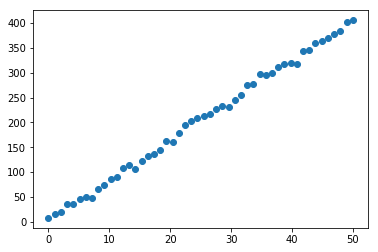

In [2]:
true_sigma = 7
intercept = 5
slope = 8
x = np.linspace(0, 50, num=50)

y = intercept + slope * x + np.random.normal(0, true_sigma, 50)

plt.scatter(x, y)
plt.show()

### Log Likelihood vs. Negative Log Likelihood

In your own words, answer the following questions:

Why do we use the log of likelihood rather than just likelihood?  In terms of optimization operations, what is the relationship between log likelihood and negative log likelihood?

Bonus question: Why do we typically use negative log likelihood in python instead of likelihood or log likelihood? (This question may take a little research)

Write your answer to these questions below this line:
________________________________________________________________________________________________________________________________

We use the log instead of the raw likelihood value to help us avoid integer overflow/underflow errors. Maximizing the Log Likelihood (LL) is the same as minimizing the Negative Log Likelihood(NLL).  This is the reason we use negative log likelihood in python--optimization libraries provide a minimize function, but not a maximize function.  Therefore, in order to use a minimizer, we must make use of NLL instead of LL. 

### Negative Log Likelihood

In the cell below, complete the following negative log likelihood function. This function should take in an array of theta parameters and return the negative log likelihood for those parameters.  This can be a bit tricky: follow the steps in the pseudocode below to do this successfully:

1. Generate sample a y value called `mu` using our data (`x`), the intercept (first element in `theta`), and the slope (2nd element in `theta`)
2. Get the `norm` of `mu` and the final element in `theta` (use the `norm` function we imported from `scipy.stats` above)
3. For that norm, get the `sum` of the `logpdf` of `y`.  This is the log likelihood. 
4. Multiply the the log likelihood by negative 1 and return our `negative log likelihood`

In [3]:
def neg_log_likelihood(theta):
    # Generate sample y value from given values contained in theta
    mu = theta[0] + x * theta[1]  # y = b + mx
    
    # This one requires some explanation. We take the norm of mu and theta[2], and then get the 
    return -1*norm(mu, theta[2]).logpdf(y).sum() # converts mu value to negative log likelihood

### MLE from Scratch With Scipy

We're almost done.  Now that we have a function that gets us the negative log likelihood, we can use an optimizer from `scipy.optimize` to try different values until we find optimal ones to `minimize` the output of our `neg_log_likelihood` function.  

In the cell below:

1. Create an array called `starting_guesses`, and set it equal to `[1, 1, 1]`.  These are placeholder values that we will start with for our `theta` array.
1. Set the `results` variable equal to a function call of `minimize()` call.  The minimize function should take in the `neg_log_likelihood` function we created above, our array of `starting guesses`, and should also set the `method` parameter equal to `Nelder-Mead` (this specifies a type of optimization that is more likely to converge than the default, for our purposes in this lab.)
1. Inspect and interpret the `results` element.

In [4]:
starting_guesses = [1, 1, 1]
results = minimize(neg_log_likelihood, starting_guesses, method='Nelder-Mead')
results

 final_simplex: (array([[3.22345644, 8.05953689, 6.09155652],
       [3.22354208, 8.05953368, 6.09151069],
       [3.22335683, 8.0595429 , 6.09156097],
       [3.22354146, 8.05953708, 6.09158789]]), array([161.29211847, 161.29211848, 161.29211848, 161.29211848]))
           fun: 161.29211847192732
       message: 'Optimization terminated successfully.'
          nfev: 277
           nit: 150
        status: 0
       success: True
             x: array([3.22345644, 8.05953689, 6.09155652])

**_Examine and interpret the values in `results.x`.  What parameter does each value correspond to? How well did our MLE algorithm perform?_**

Write your answers below this line:
________________________________________________________________________________________________________________________________

The values in `results.x` correspond directly to the values in `starting_guesses`, which in turn correspond to values of the `theta` parameter used in our `neg_log_likelihood` function.  The first value is an estimate of our intercept, which is off a bit from the true value.  The second value is the estimate of slope, which is very close to the true value.  The third value is the estimate for sigma, our standard deviation. This is also very close to the true value.  

### Conclusion

In this lab, we:

* Demonstrated understanding of general purpose behind Maximum Likelihood Estimation
* Calculated Negative Log Likelihood, and explored why MLE generally makes use of Negative Log Likelihood instead of Likelihood or Log Likelihood
* Used an optimizer from `scipy` to compute our MLE, and interpreted the results.  